# SUPPORT VECTOR MACHINE CLASSIFIER

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Let's create synthetic data points
from sklearn.datasets import make_classification

In [4]:
x,y = make_classification(n_samples = 100, n_features=2, n_classes=2, n_clusters_per_class=1, n_redundant=0)

<Axes: xlabel='0', ylabel='1'>

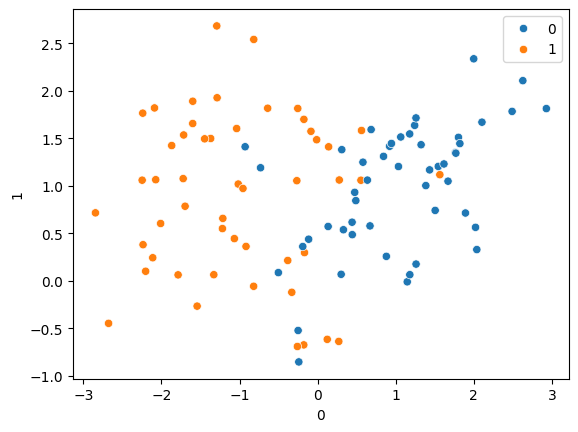

In [5]:
sns.scatterplot(x=pd.DataFrame(x)[0], y=pd.DataFrame(x)[1], hue=y)

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=42)

In [8]:
from sklearn.svm import SVC

In [9]:
svc = SVC(kernel='linear')

In [10]:
svc.fit(x_train, y_train)

SVC(kernel='linear')

In [11]:
y_pred = svc.predict(x_test)

In [12]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
accuracy_score(y_pred, y_test)

0.9333333333333333

In [13]:
classification_report(y_pred, y_test)

'              precision    recall  f1-score   support\n\n           0       0.95      0.95      0.95        19\n           1       0.91      0.91      0.91        11\n\n    accuracy                           0.93        30\n   macro avg       0.93      0.93      0.93        30\nweighted avg       0.93      0.93      0.93        30\n'

In [14]:
confusion_matrix(y_pred, y_test)

array([[18,  1],
       [ 1, 10]], dtype=int64)

# Usning kernels

In [15]:
rbf = SVC(kernel='rbf')

In [16]:
rbf.fit(x_train, y_train)

SVC()

In [17]:
y_pred_rbf = rbf.predict(x_test)

In [18]:
accuracy_score(y_pred_rbf, y_test)

0.9666666666666667

In [19]:
classification_report(y_pred_rbf, y_test)

'              precision    recall  f1-score   support\n\n           0       0.95      1.00      0.97        18\n           1       1.00      0.92      0.96        12\n\n    accuracy                           0.97        30\n   macro avg       0.97      0.96      0.96        30\nweighted avg       0.97      0.97      0.97        30\n'

In [20]:
pol = SVC(kernel = 'poly')

In [21]:
pol.fit(x_train, y_train)

SVC(kernel='poly')

In [22]:
y_pred_pol = pol.predict(x_test)

In [23]:
accuracy_score(y_pred_pol, y_test)

0.8333333333333334

In [24]:
model=SVC(kernel='sigmoid')

In [25]:
params = {
    'C': [1,2,3,4,5],
    'kernel' : ['rbf', 'poly']    ,
    'gamma' : [1.0, 1, 10]
}

In [26]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(model, params, refit=True, cv=5, verbose=3)

In [27]:
grid.fit(x_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV 1/5] END ........C=1, gamma=1.0, kernel=rbf;, score=0.786 total time=   0.0s
[CV 2/5] END ........C=1, gamma=1.0, kernel=rbf;, score=0.929 total time=   0.0s
[CV 3/5] END ........C=1, gamma=1.0, kernel=rbf;, score=0.857 total time=   0.0s
[CV 4/5] END ........C=1, gamma=1.0, kernel=rbf;, score=0.714 total time=   0.0s
[CV 5/5] END ........C=1, gamma=1.0, kernel=rbf;, score=0.857 total time=   0.0s
[CV 1/5] END .......C=1, gamma=1.0, kernel=poly;, score=0.786 total time=   0.0s
[CV 2/5] END .......C=1, gamma=1.0, kernel=poly;, score=0.857 total time=   0.0s
[CV 3/5] END .......C=1, gamma=1.0, kernel=poly;, score=0.857 total time=   0.0s
[CV 4/5] END .......C=1, gamma=1.0, kernel=poly;, score=0.786 total time=   0.0s
[CV 5/5] END .......C=1, gamma=1.0, kernel=poly;, score=0.857 total time=   0.0s
[CV 1/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.786 total time=   0.0s
[CV 2/5] END ..........C=1, gamma=1, kernel=rbf

GridSearchCV(cv=5, estimator=SVC(kernel='sigmoid'),
             param_grid={'C': [1, 2, 3, 4, 5], 'gamma': [1.0, 1, 10],
                         'kernel': ['rbf', 'poly']},
             verbose=3)

In [28]:
grid.best_params_

{'C': 1, 'gamma': 1.0, 'kernel': 'rbf'}

In [29]:
y_pred4 = grid.predict(x_test)

In [30]:
accuracy_score(y_pred4, y_test)

0.9666666666666667